<a href="https://colab.research.google.com/github/harnalashok/exercises/blob/main/bank_churn_exploratory_analysis_souravGhosh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Last amended: 10th April, 2021
#Author: Sourav Ghosh
#Commented by: Ashok K Harnal

## EDA of bank churn dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
path = "/content"
os.chdir(path)

In [ ]:
df =  pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### There are no null values.

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Let us drop RowNumber and Surname

In [ ]:
df.drop(['RowNumber', 'Surname'], axis=1, inplace=True)

In [ ]:
df.to_csv('churn_cleaned.csv', index=None)

In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = df.sort_values('CustomerId')

In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1287,15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0
4198,15565706,612,Spain,Male,35,1,0.00,1,1,1,83256.26,1
7090,15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
2020,15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
3697,15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0


In [ ]:
df['CustomerId'].is_monotonic_increasing

True

### We will drop the customer ID column befolre EDA, as this column just represents a unique identifier for each customer in our dataset.

In [ ]:
custid = df['CustomerId']
df = df.drop('CustomerId', axis=1)

### Let us see the count of target variable (0 or 1).

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

##  How to explore the data ?

Questions to ask

- What is the average credit score of exited customers and retained customers ?
- Which geographies are more common in exited customers ?
- DO exited customers have a higher or lower salary compared to retained customers ?
- What is the ratio of credit card holder in each category ?
- How is credit score distributed for the credit-card holders in each category ?
- What is the average balance of each category ?
- What is the average balance of credit-card holders and non-holders, overall ? How is it distributed across combination of credit card category and churn category ?
- Customers of which geography are more likely to avail credit card ?
- Do credit card holders have a higher or lower salary than non-holders ?
- How is average salary distributed across geographies ?
- How is the ratio of exited customers distribued by gender ?
- Average salary distribution by gender ?
- Is gender a factor in availing credit card ?
- Distribution of gender-exited-salary?
- age vs churn ? how is the variability in the age of exited vs retained ? (std())
- distribution of 'Exited' by NumberOfProducts ?
- 'Exited'vs IsActiveMember
- Exited vs estimated_salary
- salary vs gender?
- Important -> Salary vs balance and Salary vs CreditScore

#### Define functions to display percentages on bar charts

In [ ]:
# Define two general functions to annotate plots with percentages:
# See StackOverflow: https://stackoverflow.com/a/62053049

def with_hue(plot, feature, Number_of_levels, hue_levels):
    """
    Number_of_levels: No of levels in main feature
    hue_levels: No of levels in hue feature
    """
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_levels):
        total = feature.value_counts().values[i]
        for j in range(hue_levels):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_levels + i)]/total)
            x = patch[(j*Number_of_levels + i)].get_x() + patch[(j*Number_of_levels + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_levels + i)].get_y() + patch[(j*Number_of_levels + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

###  Does gender determine churn ratio ?

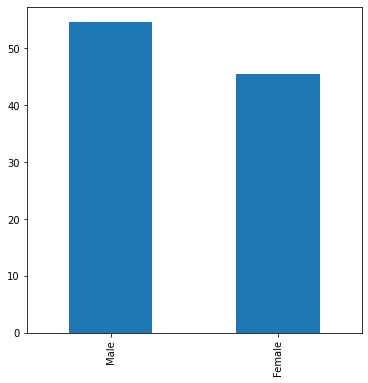

In [ ]:
plt.figure(figsize=(6,6))
(df['Gender'].value_counts() * 100 / df['Gender'].value_counts().sum()).plot(kind='bar')

#### About 55% customers in the dataset are male. We will check if this ratio is maintained across other features.

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)

Text(0, 0.5, 'Churn Percentage')

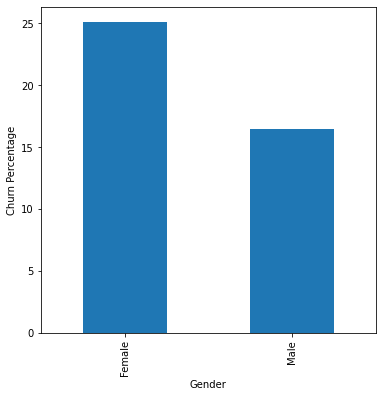

In [ ]:
(df.groupby('Gender')['Exited'].mean()*100).plot(kind='bar')
plt.ylabel('Churn Percentage')

### Overall, females have a higher churn ratio compared to males.

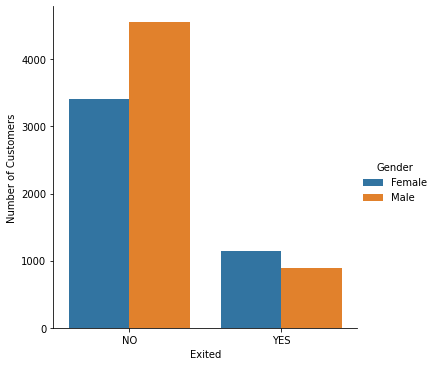

In [ ]:
ax = sns.catplot(x = 'Exited', hue= 'Gender', data= df, kind='count')
plt.xticks(range(2), ['NO', 'YES'])
plt.ylabel('Number of Customers');


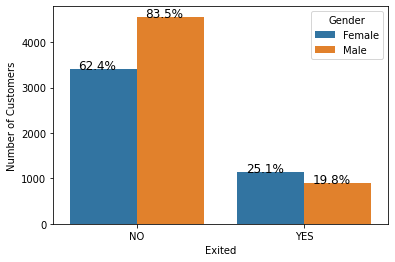

In [ ]:
ax = sns.countplot(x = 'Exited', hue= 'Gender', data= df)
plt.xticks(range(2), ['NO', 'YES'])
plt.ylabel('Number of Customers');
with_hue(ax,df.Gender,2,2)

### In retained customers, the number of males is more.

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

### Does credit score determine churn?

In [ ]:
df.groupby('Exited')['CreditScore'].mean()

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

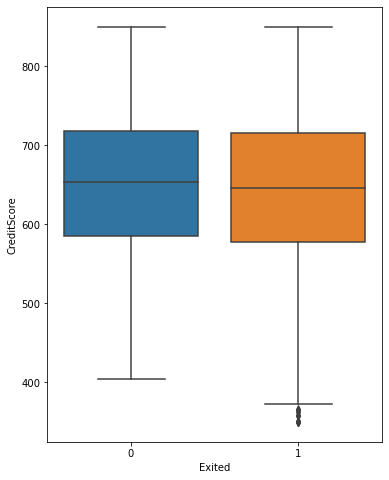

In [ ]:
plt.figure(figsize=(6,8))
sns.boxplot(x='Exited', y='CreditScore', data=df)

- The median credit scores of churned and retained customers is almost the same. 
- Exited customers seem to have the lower minimum credit score.

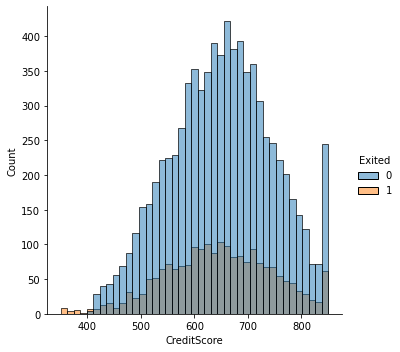

In [ ]:
sns.displot(x='CreditScore', hue='Exited', data=df)

- The credit scores of both churned and retained customers follows a normal-like distribution. 
- As deduced in the previous plot, some of the lowest credit scores in the dataset are those of churned customers.

- Let us divide the credit score into 3 categories as follows:
1. Poor = Upto score 550
2. Average = 550 < Score <= 700
3. Good = Score > 700

In [ ]:
df['Score'] = pd.cut(df['CreditScore'],
                    bins=[0,550,700,900],
                    labels=['Poor', 'Average', 'Good'])

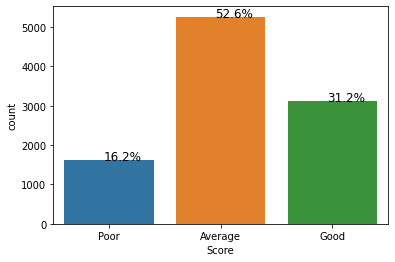

In [ ]:
ax = sns.countplot(x=df['Score'])
without_hue(ax,df.Score)

- Most customers in the dataset have an average score.

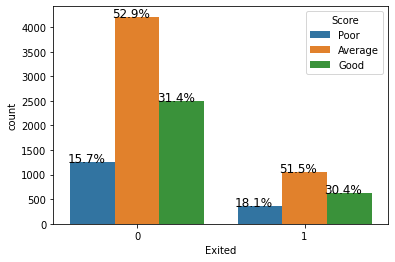

In [ ]:
ax = sns.countplot(x='Exited', hue='Score', data=df)
with_hue(ax,df.Exited,2,3)

- The same trend is maintained in churned as well as retained customers.

### Which geographies are more common in exited customers ?

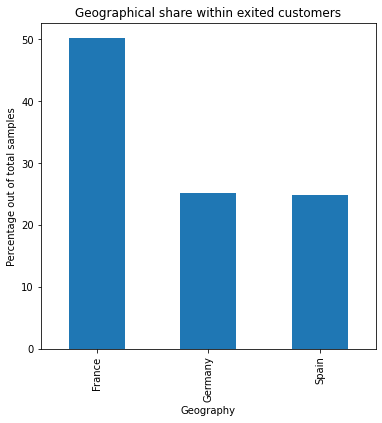

In [ ]:
# let us first look at the overall distribution of Geography

plt.figure(figsize = (6,6))
(df['Geography'].value_counts()/df['Geography'].value_counts().sum()*100).plot(kind='bar')
plt.ylabel('Percentage out of total samples')
plt.xlabel('Geography')
plt.title('Geographical share within exited customers');

- About 50% of the customers are from France. 
- Germany and Spain have an almost equal share of 25%.

In [ ]:
ct = pd.crosstab( df['Exited'], df['Geography'])
ct

Geography,France,Germany,Spain
Exited,,,
0,4204,1695,2064
1,810,814,413


- Spain has the lowest count of exited customers. The counts of France and Germany are practically equal.

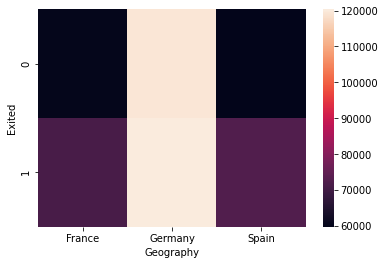

In [ ]:
# See the stark contrast generated with heatmaps
ct = pd.crosstab( df['Exited'], df['Geography'], values=df.Balance, aggfunc=np.mean)
sns.heatmap(ct)


Text(0.5, 1.0, 'Churn by geography')

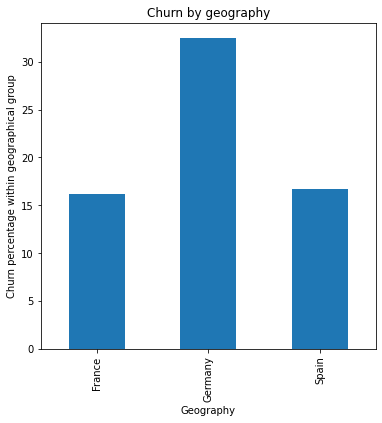

In [ ]:
plt.figure(figsize=(6,6))
(ct.loc[1] * 100.0 / ct.sum()).plot(x=ct.index, y=ct.values, kind='bar')
plt.ylabel('Churn percentage within geographical group')
plt.title('Churn by geography')

### Is there a difference in the estimated salaries of exited and retained customers ?

In [ ]:
df.groupby('Exited')['EstimatedSalary'].mean()

Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

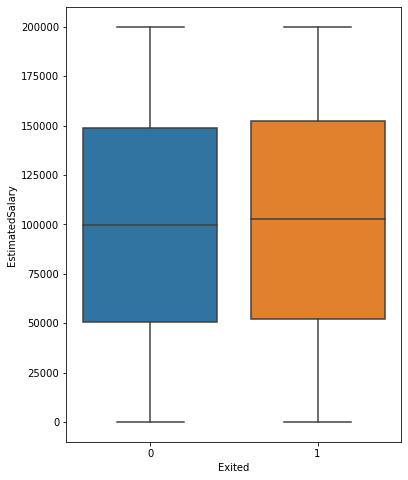

In [ ]:
plt.figure(figsize=(6,8))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)

- No significant difference seems to exist in the estimated salaries of both groups.

### Customers of what age are more likely to leave ?

<AxesSubplot:xlabel='Exited', ylabel='Age'>

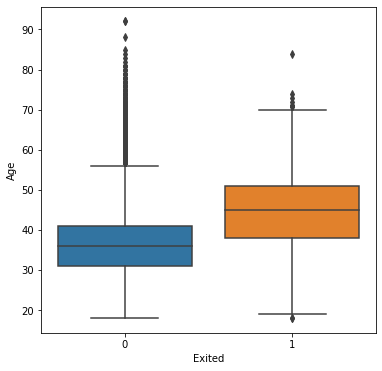

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Exited', y='Age', data=df)

#### Let us bin 'Age' into 4 categories

In [ ]:
df['Age'].min(), df['Age'].max()

(18, 92)

In [ ]:
df['AgeCat'] = pd.cut(df['Age'],
                     bins=[17,35,50,65,93],
                     labels=['Young', 'Middle-aged', 'Senior', 'Very-old'])

<AxesSubplot:xlabel='AgeCat', ylabel='count'>

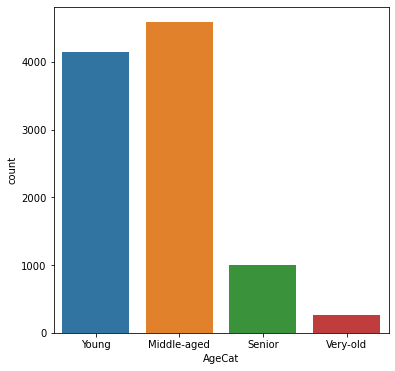

In [ ]:
sns.countplot(x='AgeCat', data=df)

<AxesSubplot:xlabel='AgeCat'>

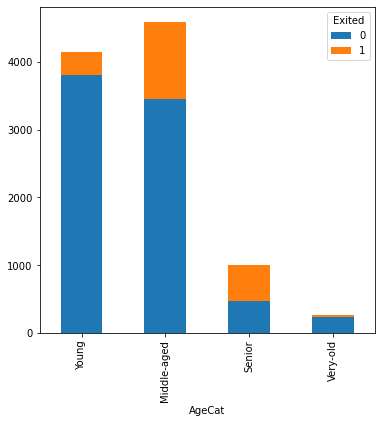

In [ ]:
pd.crosstab(df['AgeCat'], df['Exited']).plot(kind='bar', stacked=True, figsize=(6,6))

####  It seems middle-aged and senior customers have a higher tendency of leaving.

### Does holding a credit card play a role in churn ?

In [ ]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

#### About 70% of all customers in the dataset have credit cards.

In [ ]:
df.groupby('Exited')['HasCrCard'].mean()

Exited
0    0.707146
1    0.699067
Name: HasCrCard, dtype: float64

#### The overall ratio of credit card holders of 70% is maintained in churned as well as retained customers.

In [ ]:
df.groupby('HasCrCard')['Exited'].mean()

HasCrCard
0    0.208149
1    0.201843
Name: Exited, dtype: float64

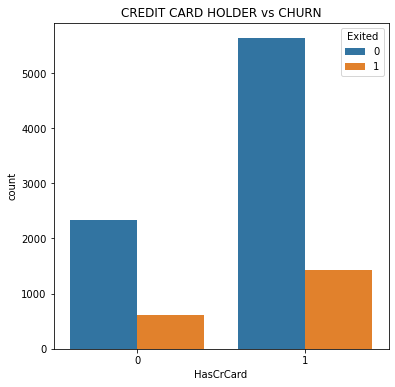

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('CREDIT CARD HOLDER vs CHURN');

### What is the average credit score of credit card holders, that of not having credit card ?

In [ ]:
df.groupby('HasCrCard')['CreditScore'].mean()

HasCrCard
0    651.345331
1    650.187952
Name: CreditScore, dtype: float64

#### Both categories of customers have a very similar credit average score. 
#### Lets see the distribution.

Text(0.5, 1.0, 'CREDIT SCORE vs CREDIT CARD HOLDING')

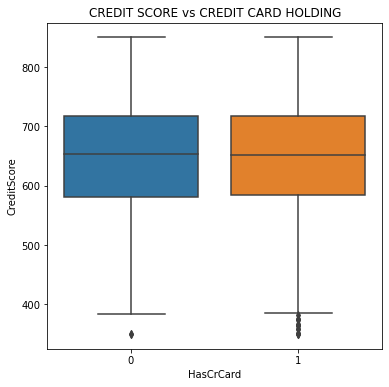

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(y='CreditScore',x='HasCrCard', data=df)
plt.title('CREDIT SCORE vs CREDIT CARD HOLDING')

- Having a credit card does not seem to affect credit score.

### Does geography determine credit card adoption ?

<Figure size 720x432 with 0 Axes>

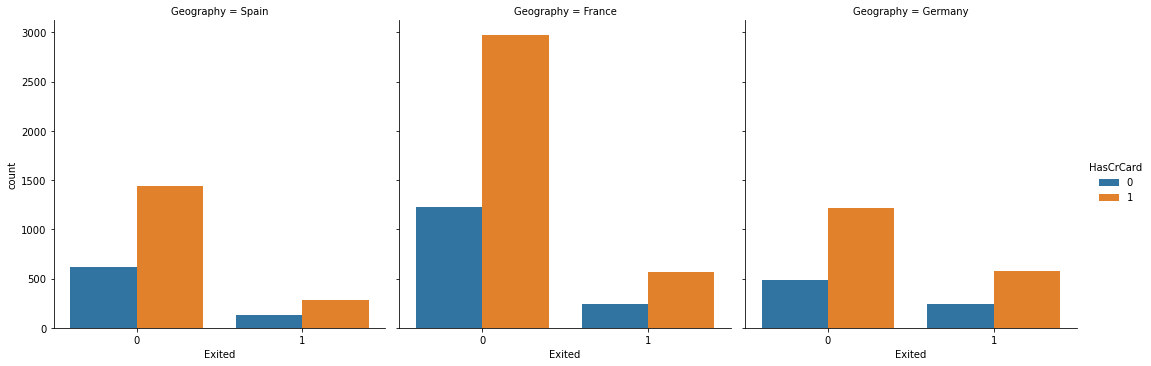

In [ ]:
plt.figure(figsize=(10,6))
sns.catplot(x='Exited', hue='HasCrCard', col='Geography', data=df, kind='count')

### What is the churn behavour by Geography and CreditCard adoption ?

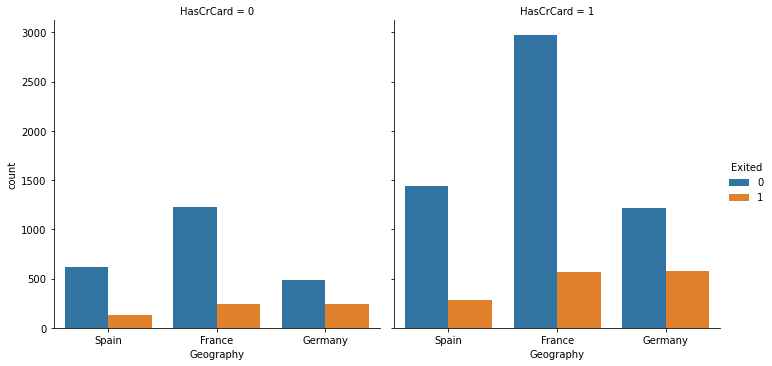

In [ ]:
sns.catplot(x='Geography', hue='Exited', col='HasCrCard', data=df, kind='count')

### What is the average balance for each category ?

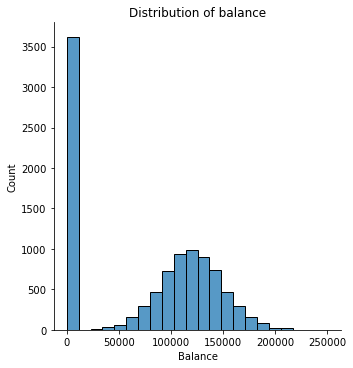

In [ ]:
sns.displot(x='Balance', data=df)
plt.title('Distribution of balance');

In [ ]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

### There seems to be huge variability in the distribution of Balance.

In [ ]:
(df['Balance'] == 0).sum()

3617

### 36% of the customers have zero balance. This may be due to inactive/frozen accounts, abandoned accounts, etc.

In [ ]:
df.groupby('Exited')['Balance'].mean()

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

#### Exited customers clearly seem to have a greater balance on average, compared to retained customers. 
#### Let us see the distribution in customers having non-zero balance.

Text(0.5, 1.0, 'CHURN vs BALANCE')

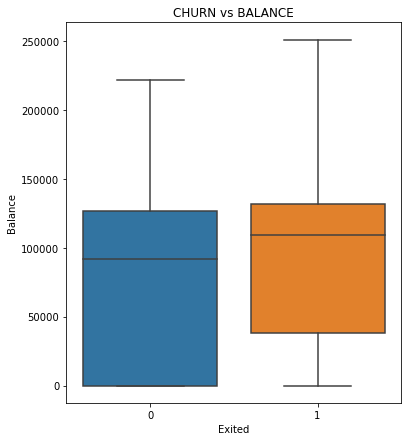

In [ ]:
plt.figure(figsize=(6,7))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('CHURN vs BALANCE')

#### Among customers with non-zero balances, the low-balance customers are more widely present in retained customers.

In [ ]:
bal_non_zero = df.loc[df['Balance']>0]

In [ ]:
(df['Balance'] < 0).sum()

0

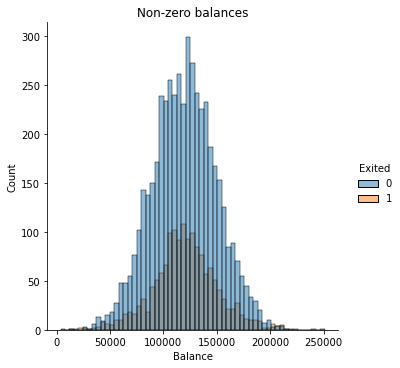

In [ ]:
sns.displot(x='Balance', hue='Exited', data=bal_non_zero)
plt.title('Non-zero balances');

#### A balance between 100000 and 130000 seems to be most common.

In [ ]:
bal_non_zero.groupby('Exited')['Balance'].mean()

Exited
0    119535.864270
1    120746.971132
Name: Balance, dtype: float64

#### In this case, the balances are similar.

Text(0.5, 1.0, 'NON-ZERO BALANCES vs CHURN')

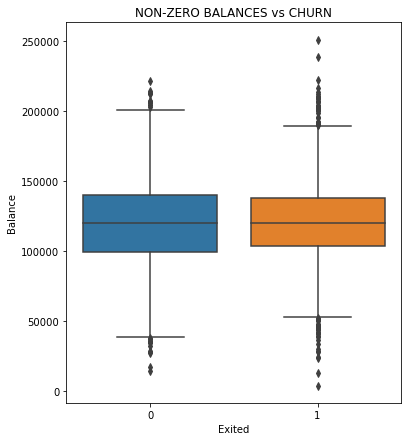

In [ ]:
plt.figure(figsize=(6,7))
sns.boxplot(x='Exited', y='Balance', data=bal_non_zero)
plt.title('NON-ZERO BALANCES vs CHURN')

### How does balance vary for credit card holders by retained and exited customers ?

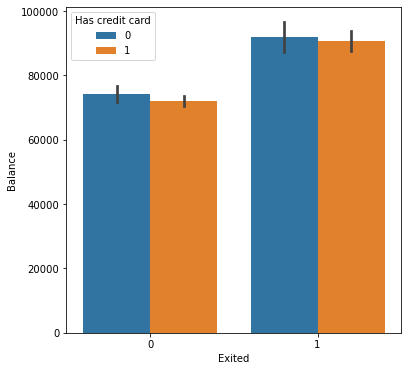

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='Exited', y='Balance', hue='HasCrCard', data=df)
plt.legend(title = 'Has credit card', loc=0)

###  Do balance and  credit score have a relationship ?

<Figure size 504x432 with 0 Axes>

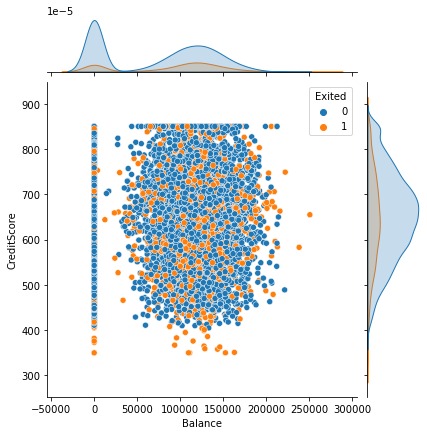

In [ ]:
plt.figure(figsize=(7,6))
sns.jointplot(x='Balance', y='CreditScore', data=df, hue='Exited')

#### No significant relationship seems to be visible between balance and credit score.

### Balance vs estimated salary ?

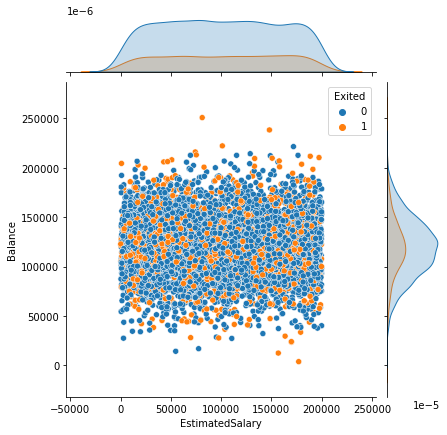

In [ ]:
sns.jointplot(x='EstimatedSalary', y='Balance', data=bal_non_zero, hue='Exited')

#### No relationship seems to exist.

###  Salary vs credit score?

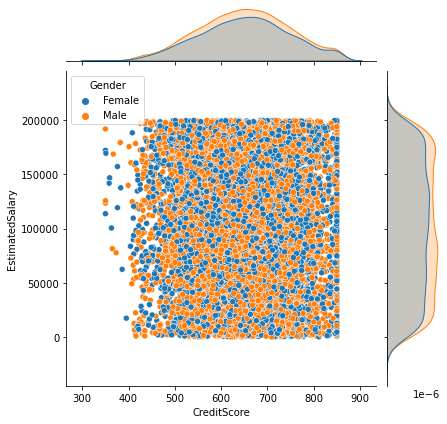

In [ ]:
sns.jointplot(x='CreditScore', y='EstimatedSalary', data=df, hue='Gender')

####  Again, no clear trend is visible. The distribution seems to be completely random.

###  How does estimated salary vary for different geographies ?

<AxesSubplot:xlabel='Geography', ylabel='EstimatedSalary'>

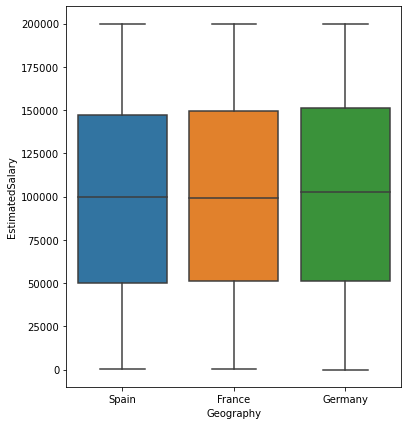

In [ ]:
plt.figure(figsize=(6,7))
sns.boxplot(x='Geography', y='EstimatedSalary', data=df)

####  The values are practically the same.

### Do males and females have a different median salary ?

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

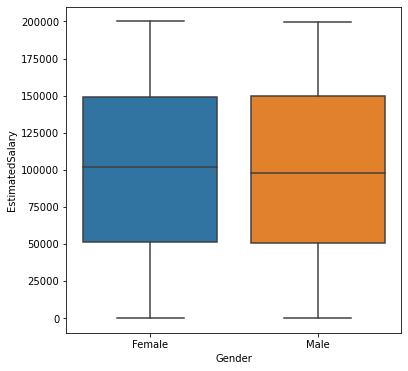

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Gender', y='EstimatedSalary', data=df)

####  Males in the dataset seem to have a slightly lower salary compared to females. This difference does not seem to be significant.

###  Credit card adoption by gender ?

In [ ]:
c = pd.crosstab(df['Gender'], df['HasCrCard'])
c

HasCrCard,0,1
Gender,,
Female,1351,3192
Male,1594,3863


<AxesSubplot:xlabel='Gender'>

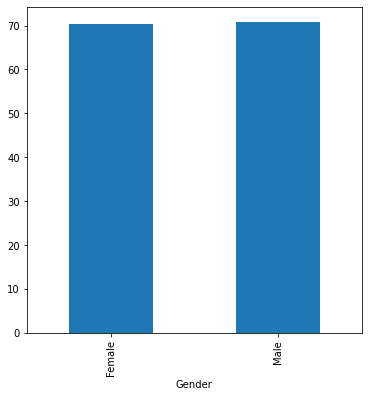

In [ ]:
(df.groupby('Gender')['HasCrCard'].mean() * 100).plot(kind='bar')

####  Males and females have equal credit card adoption ratio.

###  Does length of the relationship with the bank play a role in churn ?

<AxesSubplot:xlabel='Tenure', ylabel='count'>

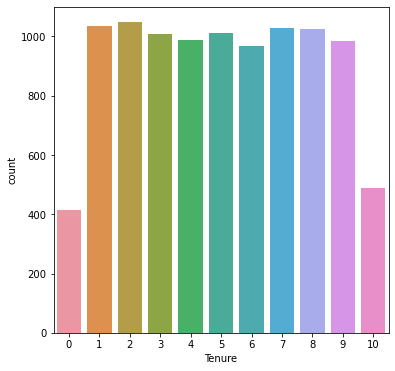

In [ ]:
sns.countplot(x=df['Tenure'])

####  Overall, there is no clear trend in the relationship length of customers with the bank.

<AxesSubplot:xlabel='Tenure', ylabel='count'>

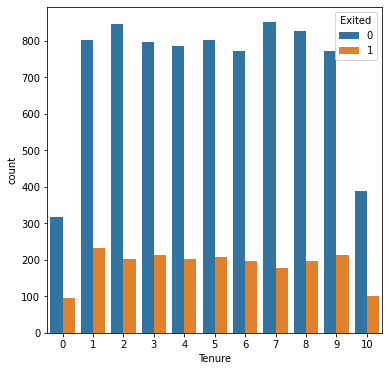

In [ ]:
sns.countplot(x='Tenure', data=df, hue='Exited')

In [ ]:
c = pd.crosstab(df['Exited'], df['Tenure'])

In [ ]:
c.loc['P_1'] =  c.loc[1] * 100 / c.sum()
c.loc['P_0'] = c.loc[0] * 100 / c.sum()
c

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,318.000000,803.000000,847.000000,796.000000,786.000000,803.000000,771.000000,851.000000,828.000000,771.000000,389.000000
1,95.000000,232.000000,201.000000,213.000000,203.000000,209.000000,196.000000,177.000000,197.000000,213.000000,101.000000
Percent_1,23.002421,22.415459,19.179389,21.110010,20.525784,20.652174,20.268873,17.217899,19.219512,21.646341,20.612245
Percent_0,72.935375,75.939877,79.368100,77.273300,77.858338,77.760936,78.094228,81.418430,79.293672,76.667111,76.183054
P_1,18.666328,20.470191,17.530892,19.234532,18.668656,18.821824,18.397483,15.710482,17.534285,19.680066,17.212135
P_0,60.272463,69.594577,72.761423,70.653949,71.063517,71.110092,71.141174,74.495765,72.564904,69.964114,64.403181


<AxesSubplot:xlabel='Tenure'>

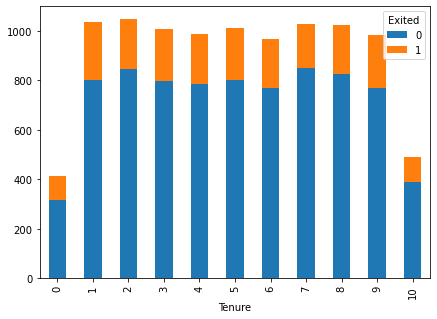

In [ ]:
c.loc[[0,1]].T.plot(kind='bar', stacked=True, figsize=(7,5))

###  Let us plot numerical columns together.

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Score', 'AgeCat'],
      dtype='object')

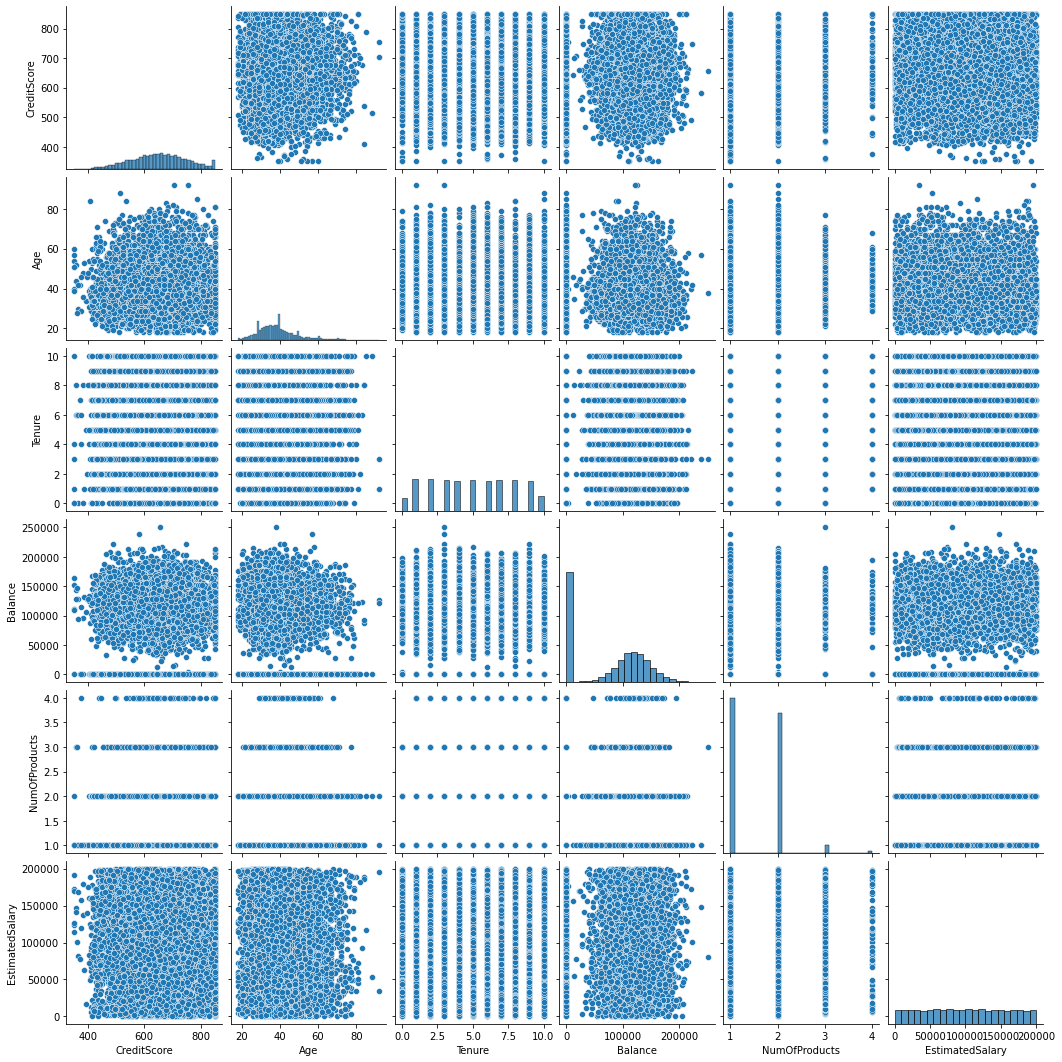

In [ ]:
sns.pairplot(df[['CreditScore', 'Age', 'Tenure', 'Balance',
                 'NumOfProducts', 'EstimatedSalary']])

####  Young people are more likely to avail multiple products from the bank compared to older people.
#### Customers with multiple products generally have a higher credit score.

###  Do active members leave less often than inactive members ?

In [ ]:
c = pd.crosstab(df['IsActiveMember'], df['Exited'])
c

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


Text(0, 0.5, 'Number of custmers')

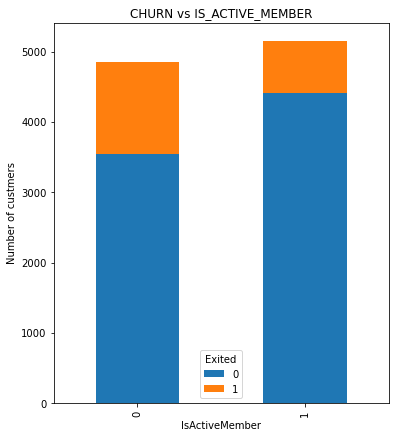

In [ ]:
c.plot(kind='bar', stacked=True, figsize=(6,7))
plt.title('CHURN vs IS_ACTIVE_MEMBER')
plt.ylabel('Number of custmers')

####  As we can see, the inactive members are leaving more. This is as expected in a real business scenario.

###  Do exited customers avail less number of products of the bank ?

In [ ]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
df['NumOfProducts'] = df['NumOfProducts'].astype('category')

Text(0.5, 1.0, 'CHURN vs NUMBER OF PRODUCTS TAKEN')

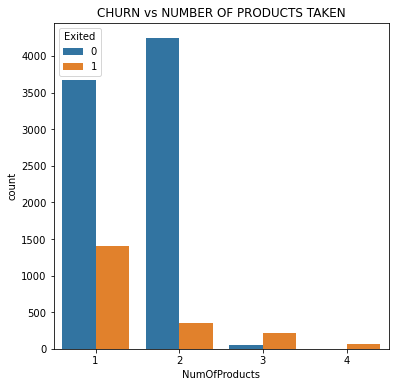

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('CHURN vs NUMBER OF PRODUCTS TAKEN')

####  Customers who have taken less number of products have a lower churn ratio.